# 2D meshing: uz cross-section

You can mesh an out of plane `Component` cross-section by supplying the argument `type="uz"` and a `xsection_bounds` under the form `[[x1,y1], [x2,y2]]`, which parametrizes a line in `u`-coordinates

In [1]:
from gdsfactory.pdk import get_layer_stack
from gdsfactory.technology import LayerStack, LayerLevel
import gdsfactory as gf
from gdsfactory.simulation.gmsh.mesh import create_physical_mesh
import meshio
from skfem.io import from_meshio
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

waveguide = gf.components.straight_pin(length=10, taper=None)
waveguide_trimmed = gf.Component()
waveguide_trimmed.add_ref(
    gf.geometry.trim(
        component=waveguide,
        domain=[[3, -4], [3, 4], [5, 4], [5, -4]],
    )
)

waveguide_trimmed

2023-02-20 17:56:05.947 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.43.1


2023-02-20 17:56:07.321 | INFO     | gdsfactory.technology.layer_views:__init__:785 - Importing LayerViews from YAML file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/layer_views.yaml.


2023-02-20 17:56:07.328 | INFO     | gdsfactory.pdk:activate:206 - 'generic' PDK is now active


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1684: UserWarning: Component 'Unnamed_ae854782' contains 1 Unnamed cells
  warnings.warn(


AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

Unnamed_ae854782: uid ae854782, ports [], references ['trim_1'], 0 polygons


In [2]:
filtered_layerstack = LayerStack(
    layers={
        k: get_layer_stack().layers[k]
        for k in (
            "slab90",
            "core",
            "via_contact",
        )
    }
)

In [3]:
filename = "mesh"

def mesh_with_physicals(mesh, filename):
    mesh_from_file = meshio.read(f"{filename}.msh")
    return create_physical_mesh(mesh_from_file, "triangle", prune_z=True)


Choosing the line going from `y=-4` to `y=4` at `x=4`, which crosses slab, via, and core:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

[]

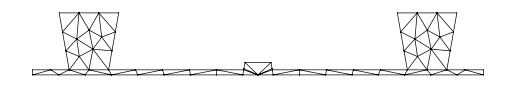

In [4]:
mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()

We can plot as usual (note that the `u-z` coordinates we are working in still map to `xy` for the plotter):

## Mesh background

You can add a convenience argument to add a background mesh around the geometry (instead of defining a dummy polygon and layer in the layerstack with low mesh_order):

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

[]

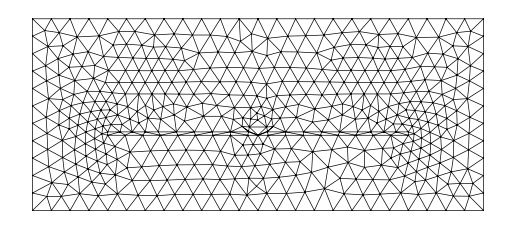

In [5]:
mesh = waveguide_trimmed.to_gmsh(
    type="uz",
    xsection_bounds=[(4, -4), (4, 4)],
    layer_stack=filtered_layerstack,
    filename=f"{filename}.msh",
    background_tag="oxide",
    background_padding=(2.0, 2.0, 2.0, 2.0),
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()